This notebook implements SENSE using sparse matrices generated by `GenMatrices.ipynb`.

In [1]:
%pylab inline

from scipy.io import mmread
from glob import glob

matrices = {mtx[:-4]: mmread(mtx).tocsr() for mtx in glob("*.mtx")}
locals().update(matrices)

csm = [
    csm0, csm1, csm2, csm3,
    csm4, csm5, csm6, csm7,
]

csm_conj = [
    csm0_conj, csm1_conj, csm2_conj, csm3_conj,
    csm4_conj, csm5_conj, csm6_conj, csm7_conj,
]

def dotf(a, b):
    return dot(a.flat, b.flat)

class FFT(object):
    def __mul__(self, o):
        return fftn(o.reshape((512,512))).flat

class IFFT(object):
    def __mul__(self, o):
        return ifftn(o.reshape((512,512))).flat

fft = FFT()
ifft = IFFT()

Populating the interactive namespace from numpy and matplotlib


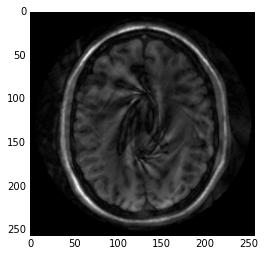

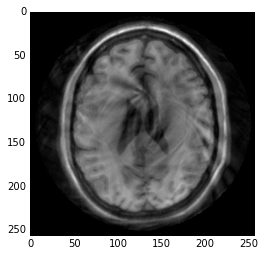

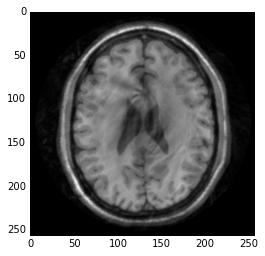

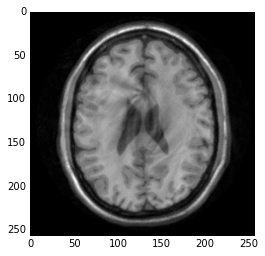

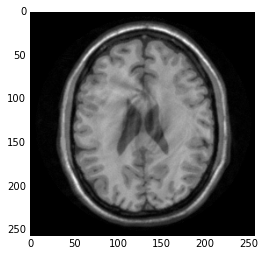

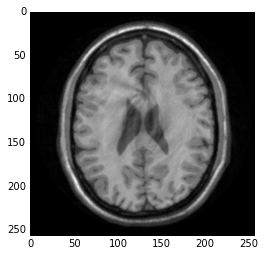

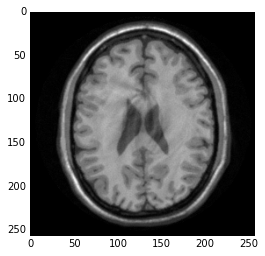

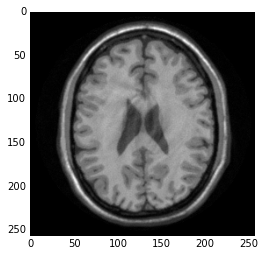

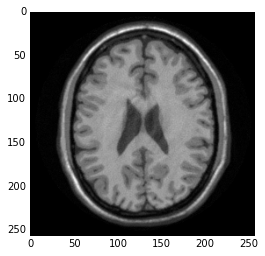

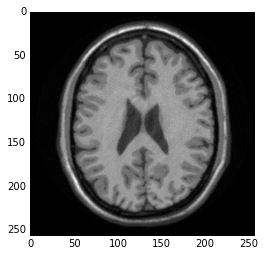

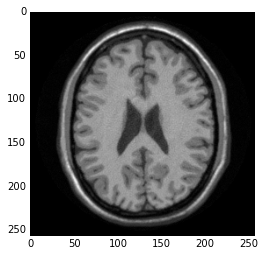

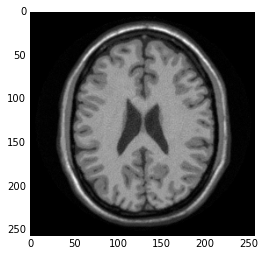

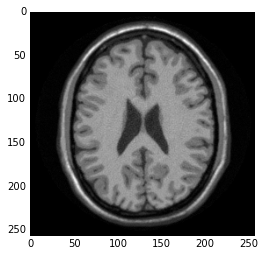

In [2]:
def AtA(image):
    im = np.zeros_like(image)
    for i in range(8):
        im += csm_conj[i] * trim * deapodize * fftshift * \
              (ifft * (ifftshift * grid * weight * sample * ifftshift * \
              ( fft * ( fftshift * preapodize * pad * csm[i] * image))))
    return im
                         
b = np.load("b.npy").flat
x = np.load("x.npy").flat
r = b - AtA(x)
p = copy(r)

for i in range(13):
    rsold = dot(r, r)
    AtAp = AtA(p)
    alpha = rsold / dot(p, AtAp)
    x += alpha * p
    r -= alpha * AtAp   
    rsnew = dot(r,r)
    beta = rsnew / rsold
    p = r + beta * p
    
    imshow(abs(x.reshape((256,256))), cmap='gray'); show()

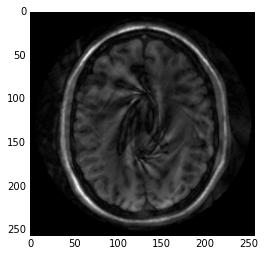

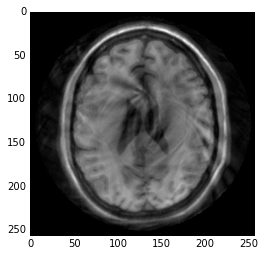

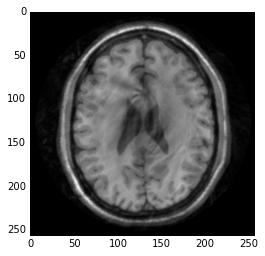

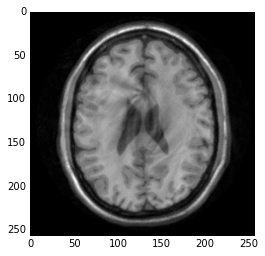

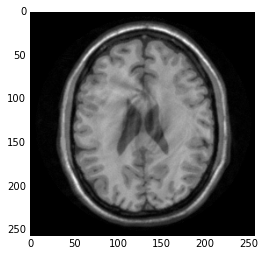

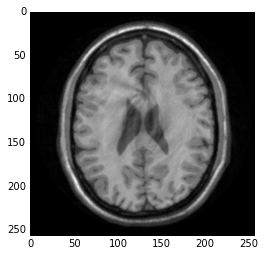

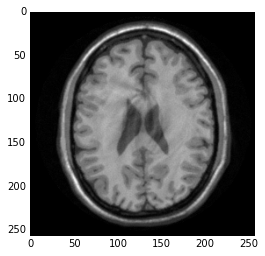

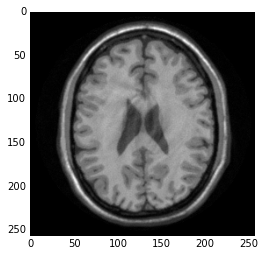

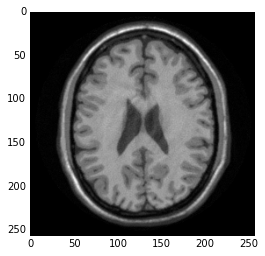

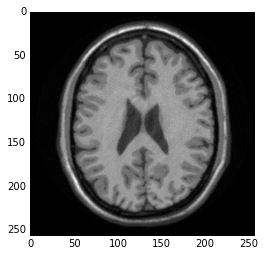

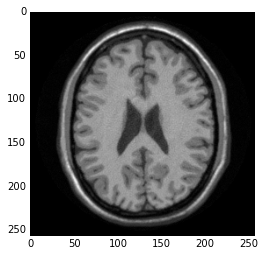

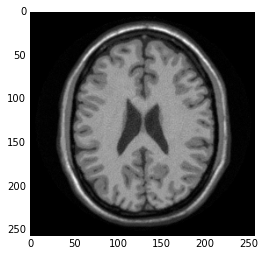

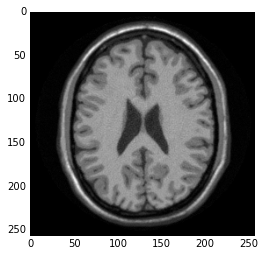

In [3]:
# Alternative: pre compute all non-fft matrices. Faster, but uglier code.

post = [(csm_conj[i] * trim * deapodize * fftshift) for i in range(8)]
pre  = [(fftshift * preapodize * pad * csm[i]) for i in range(8)]
mid  = ifftshift * grid * weight * sample * ifftshift
def AtA(image):
    im = np.zeros_like(image)
    for i in range(8):
        im += post[i] * (ifft * (mid * (fft * (pre[i] * image))))
    return im
                         
b = np.load("b.npy").flat
x = np.load("x.npy").flat
r = b - AtA(x)
p = copy(r)

for i in range(13):
    rsold = dot(r, r)
    AtAp = AtA(p)
    alpha = rsold / dot(p, AtAp)
    x += alpha * p
    r -= alpha * AtAp   
    rsnew = dot(r,r)
    beta = rsnew / rsold
    p = r + beta * p
    
    imshow(abs(x.reshape((256,256))), cmap='gray'); show()